In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

In [2]:
def func(x):
    return np.sin(x)

In [3]:
tf.enable_eager_execution()

In [4]:
class model(tf.keras.Model):
    def __init__(self):
        super(model, self).__init__()
        self.layer1 = tf.keras.layers.Dense(50, activation='relu')
        self.layer2 = tf.keras.layers.Dense(50, activation='relu')
        self.layer3 = tf.keras.layers.Dense(50, activation='relu')
        self.layer4 = tf.keras.layers.Dense(1)
    def forwardpass(self, inputs):
        x1 = self.layer1(inputs)
        x1 = self.layer2(x1)
        x1 = self.layer3(x1)
        y  = self.layer4(x1)
        return y
    def cost_function(self, data, labels):
        y = self.forwardpass(data)
        return tf.reduce_mean(tf.square(y - labels))

        

In [5]:
optimizer = tf.train.AdamOptimizer(1e-3)

In [6]:
testx_ = np.random.uniform(low=0.0, high=10.0, size=[50,1])
testy_ = func(testx_)
testx = tf.identity(testx_)
testy = tf.identity(testy_)

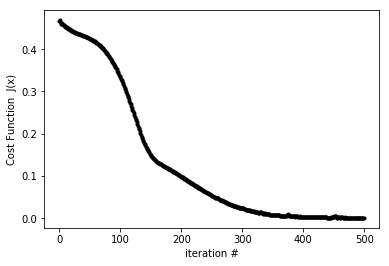

In [7]:
nn = model()
trainx_ = np.random.uniform(low=0.0, high=10.0, size=[5000,1])
trainy_ = func(trainx_)
trainx = tf.identity(trainx_)
trainy = tf.identity(trainy_)

for train_iter in range(500):
    #if ((train_iter%1)==0):
    #	print train_iter  
    
    with tf.GradientTape() as tape:
        tape.watch(nn.variables)
        cost_value = nn.cost_function(trainx, trainy)
    weight_grads = tape.gradient(cost_value, nn.variables )

    #clipped_grads_1 = [tf.clip_by_value(grads_i,-10,10) for grads_i in weight_grads[0]]
    optimizer.apply_gradients(zip(weight_grads, nn.variables), global_step=tf.train.get_or_create_global_step())
#     print( train_iter , cost_value.numpy() )

#     if (((train_iter+1)%100)==0):
#             #nn.save_weights(checkpoint_path_1)
#             print('saved weights.')

    plt.plot(train_iter, cost_value, 'k.')

    
plt.xlabel("iteration #")
plt.ylabel("Cost Function  J(x)")
plt.show()

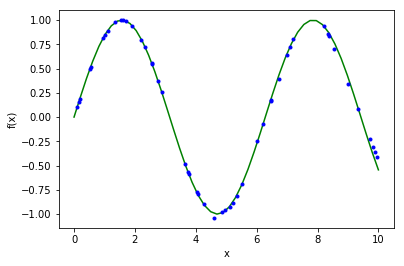

In [8]:
X = np.linspace(0,10,50)
plt.plot(X, func(X), 'g')   # Actual function in Green

predict = nn.forwardpass(testx).numpy()
plt.plot(testx_, predict, '.b')  # NN results for the test sample

plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()